# Spotting stellar-mass black holes in star clusters

In [1]:
from pkg_g19 import folder_recognition, iterations_counter
import pkg_g19.cluster as cl
import pkg_g19.mass as ms
import pkg_g19.evolution as ev
import matplotlib.animation as animation
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display

In [2]:
%matplotlib notebook

*Laboratory of Computational Physics (mod. A) project (A.Y. 2020/2021)*

 Group 19: **Benassi Federica** (2019102), **Ghidoni Rebecca** (2026709),
 **Negri Luca** (2027589), **Rinaldi Luca** (2026363)


<img src="New_Hubble_image_of_star_cluster_Messier_15.jpg"  alt="Drawing" style="width: 400px;"/>

***

<img src="MergingBlackHoles_V2.jpg"  alt="Drawing" style="width: 400px;"/>




## Introduction
***

Gravitational waves have been detected by the interferometers LIGO and VIRGO in 2015 thanks to the observation of merging black holes in binary systems. The study of these objects and their dynamics is therefore fundamental in order to understand how gravitational waves form and to improve the forthcoming detections. In this project we studied the dynamics of star clusters in 83 simulations in a time interval of 100 Mys, with particular focus on black holes and their behavior in binary systems.

### Simulation code: NBODY6++GPU

The clusters and their evolution have been generated by NBODY6++GPU, a simulation code for the N-body dynamics based on the direct integration of the Newtonian equations of motion and the Hermite polynomial interpolation. The code has been realized by Emil Khalisi, Long Wang and Rainer Spurzem, and its development began in the 1960s. It takes in input a minimum of 90 parameters which guide one simulation run for its technical properties (such as the duration of the simulation or the intervals of output) and physical features (size of the cluster or initial conditions).
  

### Data structure


The output is divided in many data files, providing snapshots with a certain iteration frequency in order to study the evolution of the properties of the cluster and the formation and dynamics of its components.
Each data file is structured as **name**.**unit**_**step**:
- *name* identifies the data contained inside the file;
- *unit* identifies the subroutine of the code from which the data have been produced
- *step* identifies the iteration step at which data have been produced.


The tasks assigned required us the usage of three main data files, each belonging to the same subroutine:
+ single.40_*step*, showing the data of the isolated stars; 
+ binary.40_*step*, showing the data of binary systems;
+ merger.40_*step*, showing the data of N > 2 bound systems.

These output files show a great number of features (varying from 14 to 50). For our purposes we only considered the **mass** ($M$, reported in solar masses), the **type** ( $K*$ ) and the **position array** ($X$, $Y$, $Z$, reported in Parsecs, with (0,0,0) being the center of mass of the cluster) as features, importing them as Pandas dataframes.

Since these systems contain a different number of objects, the data organization of their corresponding files is different, and so the column indices to be selected while reading the files.


+ single.40_ contains data about single stars in each row, so the dataset obtained has the form

NAME| M($M_{\odot}$) | K* | $X$ | $Y$ | $Z$
---|---|--- | --- | --- | --- |
 

+ binary.40_ contains data about binary stars: in each row the dataset will have the information about both the stars (1 and 2) in the binary system



NAME1 | NAME2 | M1($M_{\odot}$) |  M2($M_{\odot}$) | K*(1) | K*(2) | $X_{CM}$ | $Y_{CM}$ | $Z_{CM}$
---|---|--- | --- | --- | --- | --- | --- | --- |

+ merger.40_ contains data about more complex systems involving binary stars and another object. Therefore, the structure of the dataset is:



NAME1 | NAME2 | NAME3 | M1( $M_{\odot}$) |  M2($M_{\odot}$) | M3($M_{\odot}$) | K*(1) | K*(2) | K*(3) | $X_{CM}$ | $Y_{CM}$ | $Z_{CM}$
---|---|--- |---|---| --- | --- | --- | --- |---| --- | --- |

### Code structure


All the code written used in this notebook can be found in the `pkg_g19` python module. The module is divided into 4 main parts:


- `pkg_g19.__init__` contains the functions used to import the data in Pandas dataframes and analyze the contents of the directories
- `pkg_g19.cluster`  contains the function relating to the study of whole clusters
- `pkg_g19.mass `    contains the functions relating to the analysis of mass distribution of Black holes
- `pkg_19.evolution` contains the functions used to examine the evolution of the mass function during the time of the simulation


## NBODY: clusters and simulation parameters
***

Star clusters are a really diverse class of objects in nature,  having anywhere from 100s to 100s of thousands of stars. All stars in a cluster are born around the same time, from the same gas cloud, and after  ~2 Million years all star formation is stopped.

These simulations aim to show the behaviour of young star clusters, with sizes ranging from ~8000 stars to ~15000 stars, with a somewhat uniform distribution. All stars have the same age and no new ones are born during the simulation. For all simulations the metallicity parameter is set to $Z_0=0.0002$. 

Compared to the sun's neighbourhood, the star density in the clusters is really high. This results in chaotic gravitational interactions that sometimes end up in the ejection of some stars from the cluster. In these simulations everytime a star gets more than 50 Parsec away from the center of the cluster, it is considered ejected, and its parameters are not printed in the output files anymore. So, the total number of stars and the mass function of the cluster changes during the time in which it is simulated. We will show this effect more in detail in the next chapters

***
These plots show the starting positions of some of the simulations. Only the $X$ and $Y$ coordinates of the stars are shown.


<IPython.core.display.Javascript object>


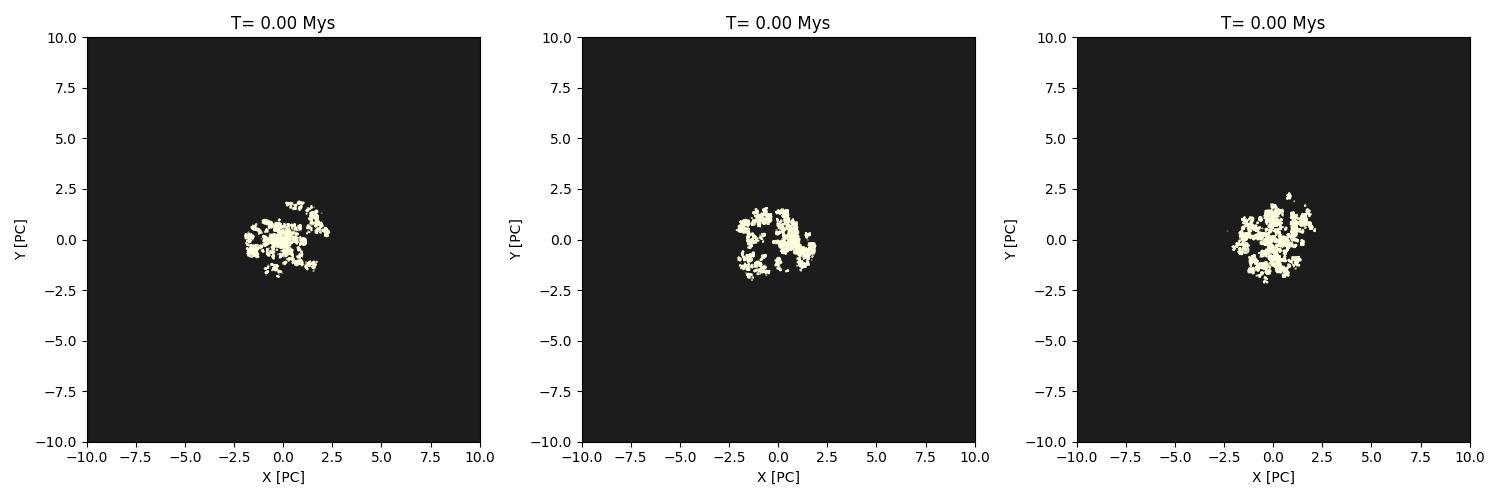

In [3]:
folders=folder_recognition('/data_2020')
paths=['/data_2020/'+Mx+'_D1.6_Z0.0002' for Mx in folders]


fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=[15,5])

size=[4,4]
lims=[-10,10,-10,10]

data=cl.cluster_importer(paths[2],start=0,step=1)
cl.cluster_plotter(0,data,size=size,lims=lims,ax=ax1)

data=cl.cluster_importer(paths[30],start=0,step=1)
cl.cluster_plotter(0,data,size=size,lims=lims,ax=ax2)

data=cl.cluster_importer(paths[-1],start=0,step=1)
cl.cluster_plotter(0,data,size=size,lims=lims,ax=ax3)
plt.tight_layout()


plt.show()

Here are the same clustrers and how they appear at the end of the simulation. The stars are now much more spread out

<IPython.core.display.Javascript object>


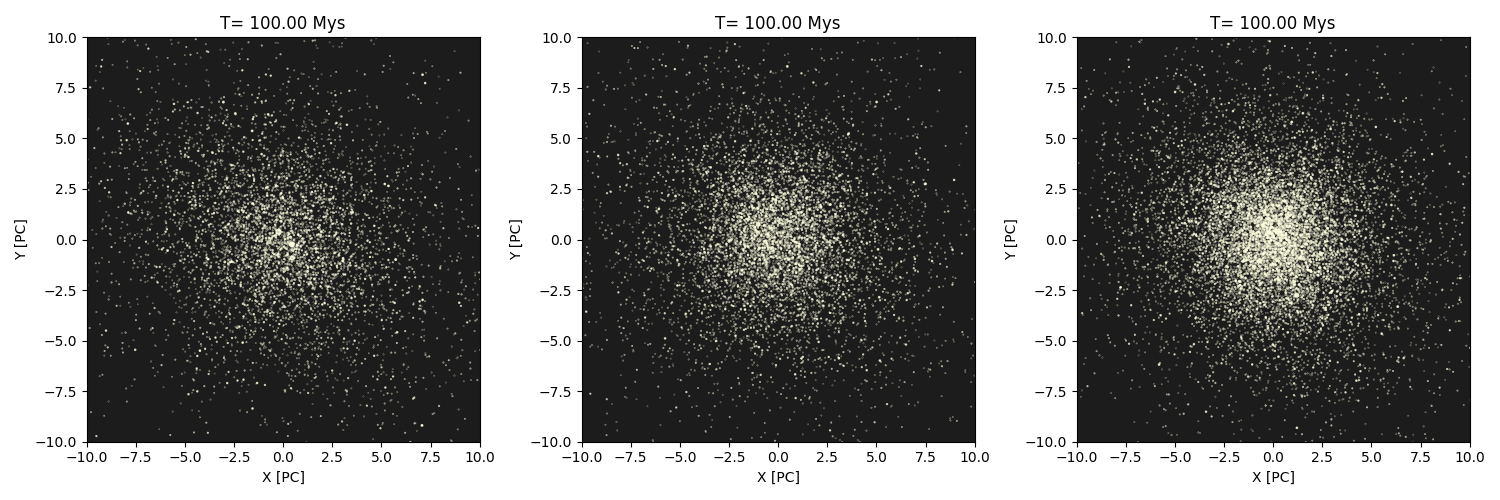

In [4]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=[15,5])

size=[4,4]
lims=[-10,10,-10,10]

name1 = 'single.40_'


start=iterations_counter(paths[2], name1)-1
data=cl.cluster_importer(paths[2],start=start,step=1)
cl.cluster_plotter(0,data,size=size,lims=lims,ax=ax1,BH_plotter=False)

start=iterations_counter(paths[30], name1)-1
data=cl.cluster_importer(paths[30],start=start,step=1)
cl.cluster_plotter(0,data,size=size,lims=lims,ax=ax2,BH_plotter=False)

start=iterations_counter(paths[-1], name1)-1
data=cl.cluster_importer(paths[-1],start=start,step=1)
cl.cluster_plotter(0,data,size=size,lims=lims,ax=ax3,BH_plotter=False)
plt.tight_layout()


plt.show()

Also, we produced an animation to see the dynamics of the cluster. The left end side image represents one of the clusters in a 25-parsecs range, while the right end side one represents the same cluster in a 10-parsecs range. As it can be seen, the motion of the stars is very chaotic and many of them are expelled.

In [5]:
#from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='cluster25.gif'></td><td><img src='cluster10.gif'></td></tr></table>"))

,


### Task 1: number of black holes and final mass distribution

The number of the black holes in each cluster is around 10, therefore considering a single cluster at a time does not give us much information about the mass distribution we are looking for. Considering all the black holes from all the simulations at a certain time gives us an appropriate amount of data for our studies. This is done thanks to the function *stars_survey*. At first the code has been written for the study of all the stars of the cluster: in a following time an option for only selecting the black holes (which have $K*$ = 14) has been implemented.

The evolution of the mass function of the black holes in time is given by two main terms: 
- the formation of new black holes via stellar evolution
- the expulsion of black holes from the cluster via gravitational interactions

In the plot below we show the total number of black holes present at a given timestep in all of the simulations.

It's highlighted where the black hole expulsion trend overtakes the black hole creation trend


<img src="Black_hole_N_evolution.png">

Now we focus on the **final** mass distribution of the black holes (at a time $T$ = 100 Mys), and in the following paragraphs we will consider also the evolution.

In [6]:
data_single = ms.stars_survey('/data_2020', 'single', final_masses = True, black_holes = True)
data_binary = ms.stars_survey('/data_2020', 'binary', final_masses = True, black_holes = True)
data_merger = ms.stars_survey('/data_2020', 'merger', final_masses = True, black_holes = True)

In [7]:
display(data_merger)

,Name1,Name2,Name3,NameCM,Mass1,Mass2,Mass3,Type1,Type2,Type3,TypeCM
0,3370,3369,3377,-3370,53.907799,47.701431,42.344032,14,14,14,0
1,4037,4038,4031,-4037,33.732113,23.040028,46.510712,14,14,14,0
2,5277,5249,5253,-5277,42.545353,52.926327,32.013306,14,14,14,0


As seen in the desctiption of the datasets, *data_binary* and *data_merger* have different structures and multiple masses for each row. It is therefore necessary to do some other data manipulation in order to plot the mass distribution. This is done by the function *mass_wrapper*.

In [8]:
single_masses, binary_masses, merger_masses = ms.mass_wrapper(data_single, data_binary, data_merger)

<IPython.core.display.Javascript object>


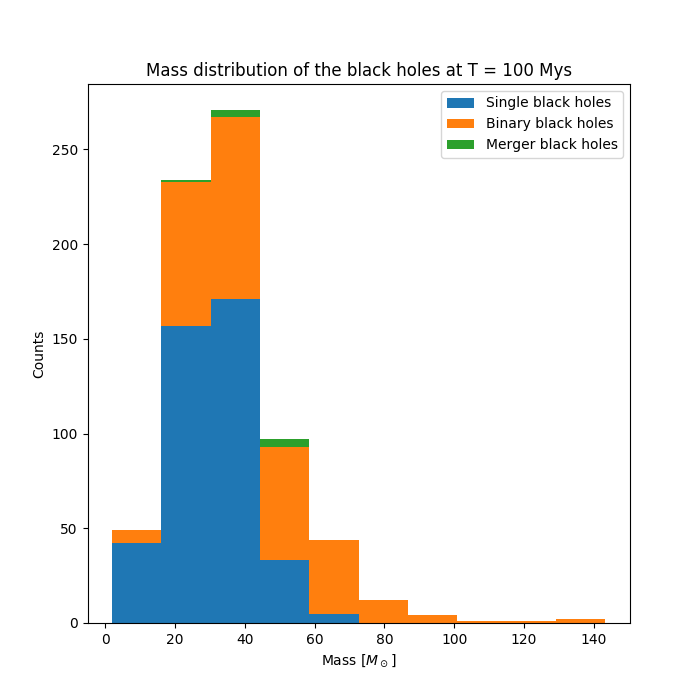

In [9]:
ms.histplotter([single_masses, binary_masses, merger_masses], ['Single black holes', 'Binary black holes', 'Merger black holes'], 'all')

### Task 2: study of binary systems

We now focus on the features of the black holes binary systems. In particular, we are interested in the binary system formed by two black holes.

In [10]:
binary_2 = data_binary[[all([a,b]) for a,b in zip(data_binary['Type1']==14, data_binary['Type2']==14)]]
doublebh_masses = pd.concat([binary_2['Mass1'], binary_2['Mass2']], ignore_index=True)

<IPython.core.display.Javascript object>


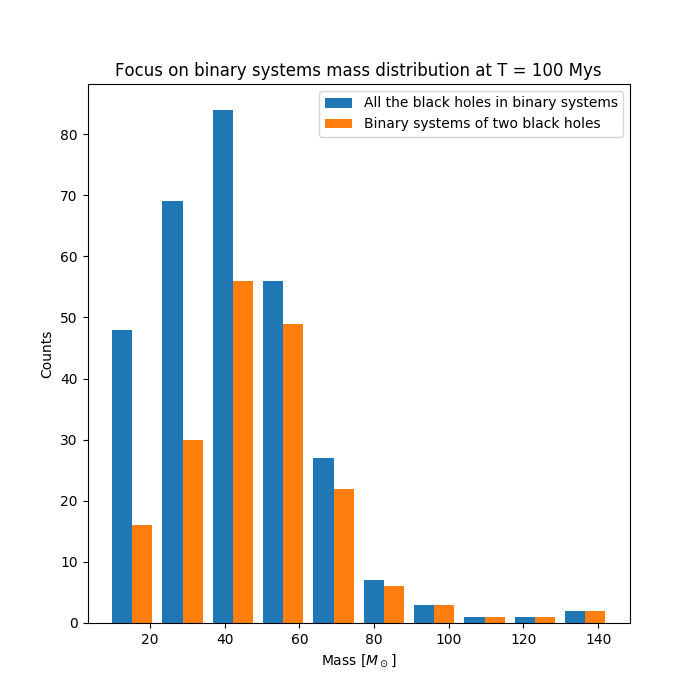

In [11]:
ms.histplotter([binary_masses, doublebh_masses], ['All the black holes in binary systems', 'Binary systems of two black holes'], 'binary')

Our aim is now to plot the characteristics of every single binary black hole system we found in the simulations, which were, counting the ones ejected from the cluster before the end of the simulation, 137 in total.

We chose to plot the primary black hole mass ($M_1$) Vs the secondary black hole mass ($M_2$) and confront the data with the observations made by the Ligo-Virgo collaboration (these observations have quite large error bars, here not plotted). The data agree pretty well, taking into account the fact that we haven't considered the merger time of these systems.

The green circle indicates a weird Ligo-Virgo detection. Star evolution forbids the formation of black holes of such high masses, but, if we take into account the chaotic interactions that occur in the centers of star clusters (as it was done in these simulations) such systems can actually arise. 

<IPython.core.display.Javascript object>


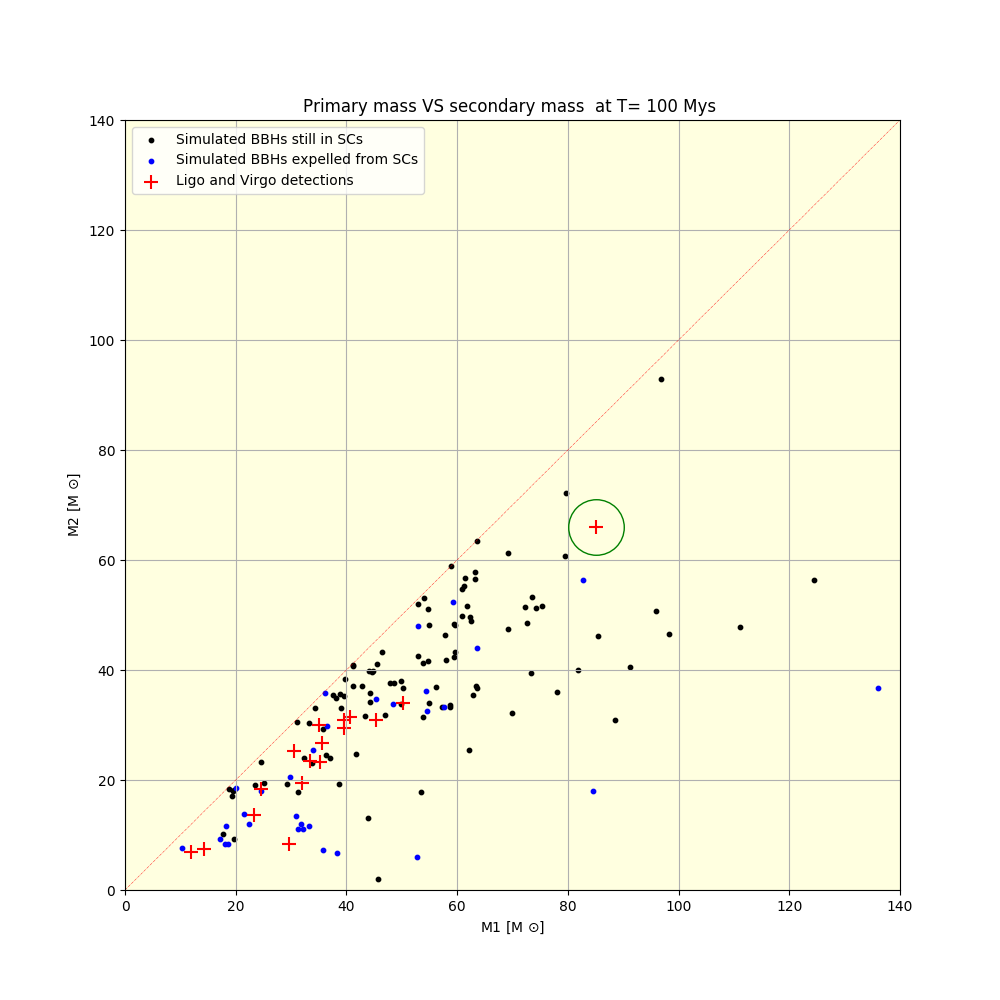

In [12]:
binary_bhs_tot=pd.read_csv('Binary_BHs_M1M2.csv')
ms.Mass1_vs_Mass2(binary_bhs_tot,specialBhs=0)

### Task 3: Black holes evolution in binary systems

We now want to show how the mass distribution of the black holes in binary system varies during the 100 Mys of the simulation.

The idea is to collect every black hole's mass among every simulation at each time step; but the number of iterations is not constant through the different simulations.
In order to do that we sample at certain iterations different from a simulation to another, but corresponding to around the same time in Mys.

In [13]:
#data = ev.evolution('../data_2020/', 'binary', 101, '101_step2.txt')
data = pd.read_csv('101_step2.txt', index_col=0)

The procedure is pretty time consuming so the function also provides the possibility to save the result in a csv file.
The result consists in a Pandas dataframe in which the mass values of every black hole are stored in every row and each row is indexed with the relative time step in Mys.

The data can now be processed to obtain, for every time step, the black holes mass distribution fixing the number of bins.

In [14]:
masses, t_step, dist = ev.mass_distribution(data, 10,density=False)

<IPython.core.display.Javascript object>


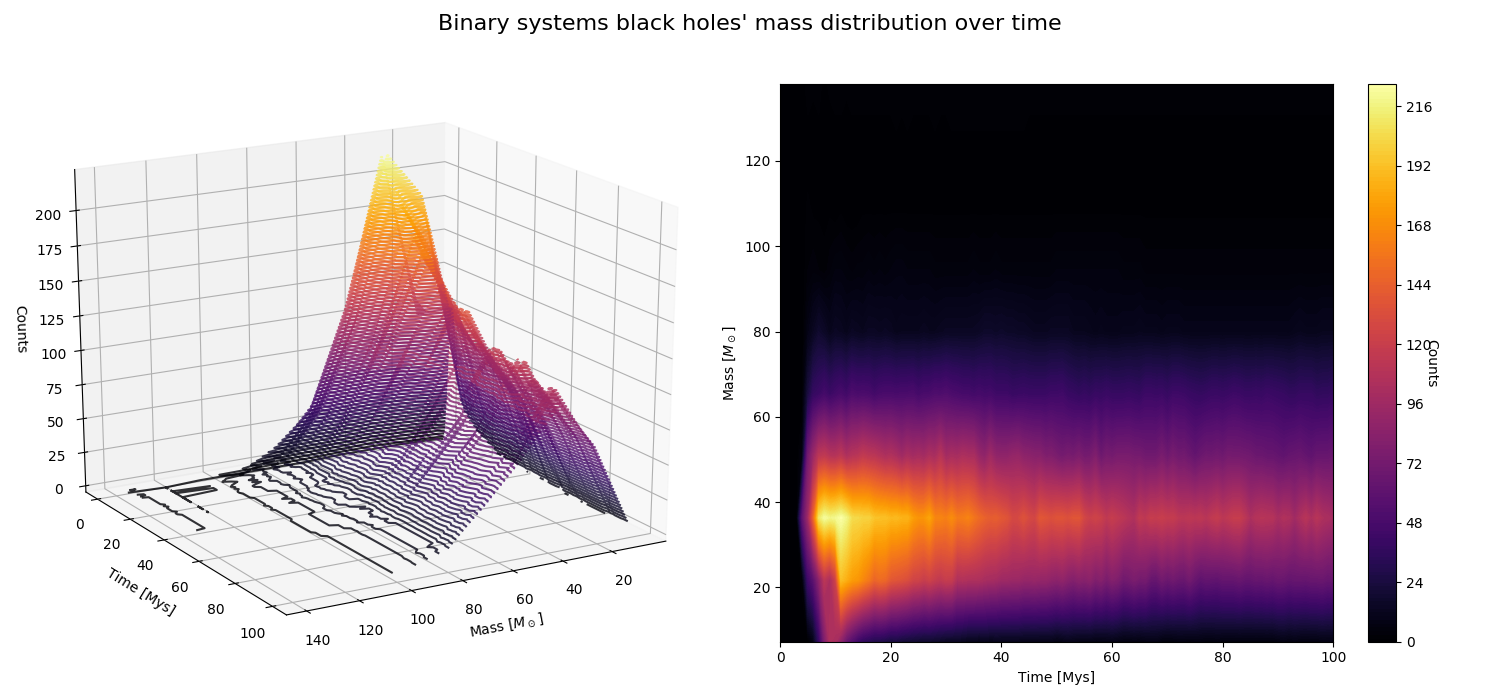

In [15]:
fig = plt.figure(figsize=[15,7])
fig.suptitle("Binary systems black holes' mass distribution over time", size=16)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2)
ev.evo_plotter3D(t_step, masses, dist, ax1)
im = ev.evo_plotter(t_step, masses, dist, ax2)
ax1.dist= 9
fig.tight_layout()
cbar = plt.colorbar(im)
cbar.set_label('Counts',rotation=270)
fig.subplots_adjust(top=0.88)
plt.show()

Here is an animation showing the evolution of the mass function of the black holes

In [16]:
#ani = ev.mass_animation(t_step, masses,dist,log_scale=False)
#ani.save('./evo101.gif',writer='imagemagick',fps=10)
display(HTML("<table><tr><td><img src='evo101.gif'></td></tr></table>"))

""


Focusing just on binary systems consisting of two black holes:

In [17]:
#data = ev.evolution('../data_2020/', 'binary', 101, '101_BBHS.txt',BBHS=True)
data = pd.read_csv('101_BBHS.txt', index_col=0)

In [18]:
masses, t_step, dist = ev.mass_distribution(data, 10,density=False)

<IPython.core.display.Javascript object>


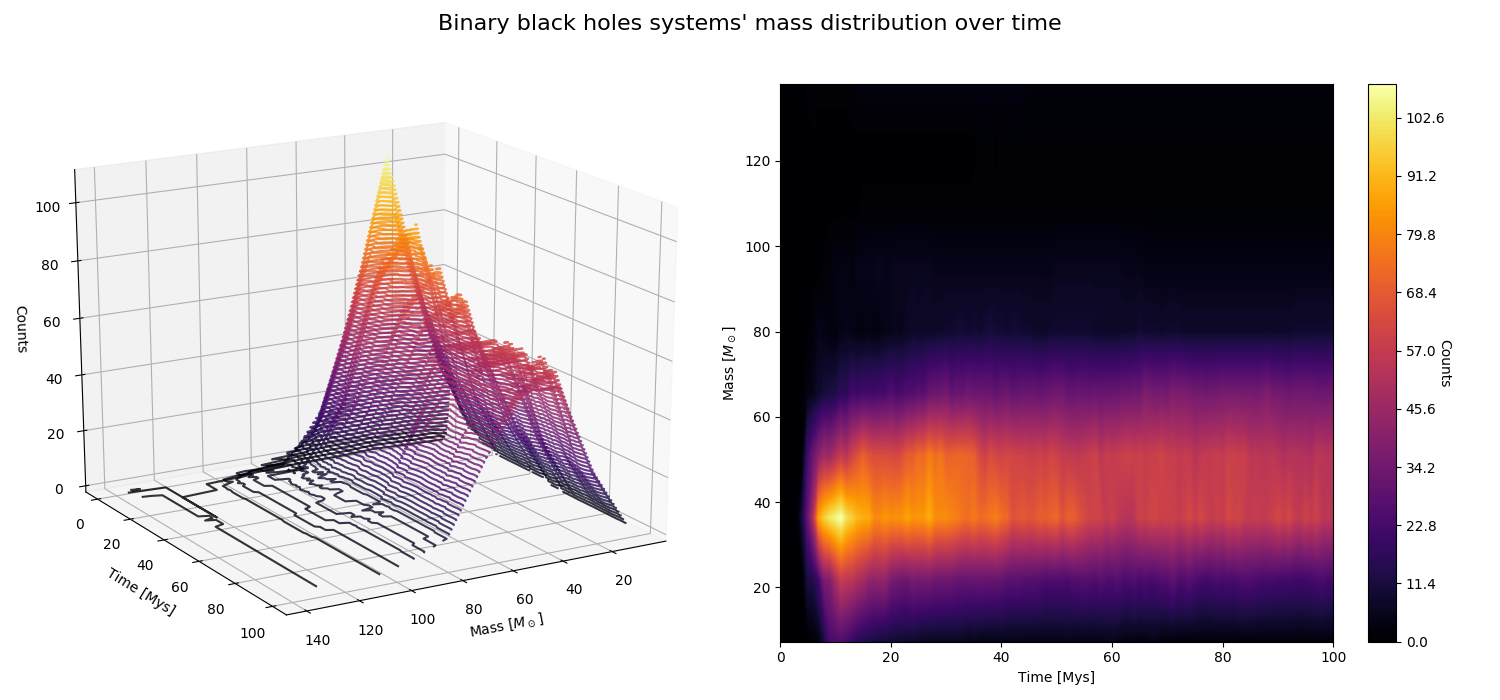

In [19]:
fig = plt.figure(figsize=[15,7])
fig.suptitle("Binary black holes systems' mass distribution over time", size=16)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2)
ev.evo_plotter3D(t_step, masses, dist, ax1)
im = ev.evo_plotter(t_step, masses, dist, ax2)
ax1.dist= 9
fig.tight_layout()
cbar = plt.colorbar(im)
cbar.set_label('Counts',rotation=270)
fig.subplots_adjust(top=0.88)
plt.show()

In [20]:
#ani = ev.mass_animation(t_step, masses,  dist,log_scale=False)
#ani.save('./evo101BBHS.gif',writer='imagemagick',fps=10)
display(HTML("<table><tr><td><img src='evo101BBHS.gif'></td></tr></table>"))

""


# Conclusions
We observe that the number of black holes changes in the evolution because of the time required for their formation and their occasional expulsion due to the dynamics of the gravitational interactions inside the clusters or their merging with other black holes.
The strong gravitational attraction of the black holes drives to the formation of binary systems black hole-star or black hole-black hole. 
As it can be seen, the masses of the black holes are in a range of few solar masses to a maximum of 140 M$_{\odot}$, and the most of them can be found in a range between 20 and 45 M$_{\odot}$. This also reflects on the mass distributions of the black holes in binary systems and in the systems of binary black holes: stellar black holes in binary systems tend to lose their circumstellar envelope in non-conservative processes, so their final mass is approximatively the mass of their respective cores.


Our analysis is in line with the observations made by the Ligo-Virgo collaboration, even in the most extreme cases, where  the binary black holes systems would have not been possible if explained by stellar evolution only. Nbody simulations, on the contrary, can give birth to systems of very high masses.           


## Bibliography

+ Ugo N. Di Carlo, Michela Mapelli, Nicola Giacobbo, Mario Spera, Yann Bouffanais, Sara Rastello, Filippo Santoliquido, Mario Pasquato, Alessandro Ballone, Alessandro A. Trani, Stefano Torniamenti, Francesco Haardt. Binary black holes in young star clusters: the impact of metallicity, 2019, https://arxiv.org/abs/2004.09525

+ Ugo N. Di Carlo, Nicola Giacobbo, Michela Mapelli, Mario Pasquato, Mario Spera, Long Wang, Francesco Haardt. Merging black holes in young star clusters, 2019, https://arxiv.org/abs/1901.00863
 
 
 ##### image credits
 
 - [1] https://upload.wikimedia.org/wikipedia/commons/8/8b/New_Hubble_image_of_star_cluster_Messier_15.jpg 
 - [2] https://upload.wikimedia.org/wikipedia/commons/c/c4/MergingBlackHoles_V2.jpg
